# KdV Equation

This notebook uses a C++ program to solve the KdV equation
$$
\partial_t u + 6 u \partial_{x} u - u \partial_{xxx} u = 0
$$
and then visualizes the results

## Test and Visualize Results

#### Load various modules and set defaults

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
import pandas as pd
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['animation.html'] = 'html5'

#### Run the KdV equation solver

In [2]:
!cd build && ./kdv

writing output 0
writing output 1000
writing output 2000
writing output 3000
writing output 4000
writing output 5000
writing output 6000
writing output 7000
writing output 8000
writing output 9000
writing output 10000
writing output 11000
writing output 12000
writing output 13000
writing output 14000
writing output 15000
writing output 16000
writing output 17000
writing output 18000
writing output 19000
writing output 20000
writing output 21000
writing output 22000
writing output 23000
writing output 24000
writing output 25000
writing output 26000
writing output 27000
writing output 28000
writing output 29000
writing output 30000
writing output 31000
writing output 32000
writing output 33000
writing output 34000
writing output 35000
writing output 36000
writing output 37000
writing output 38000
writing output 39000
writing output 40000
writing output 41000
writing output 42000
writing output 43000
writing output 44000
writing output 45000
writing output 46000
writing output 47000
writi

#### Plot the initial condition

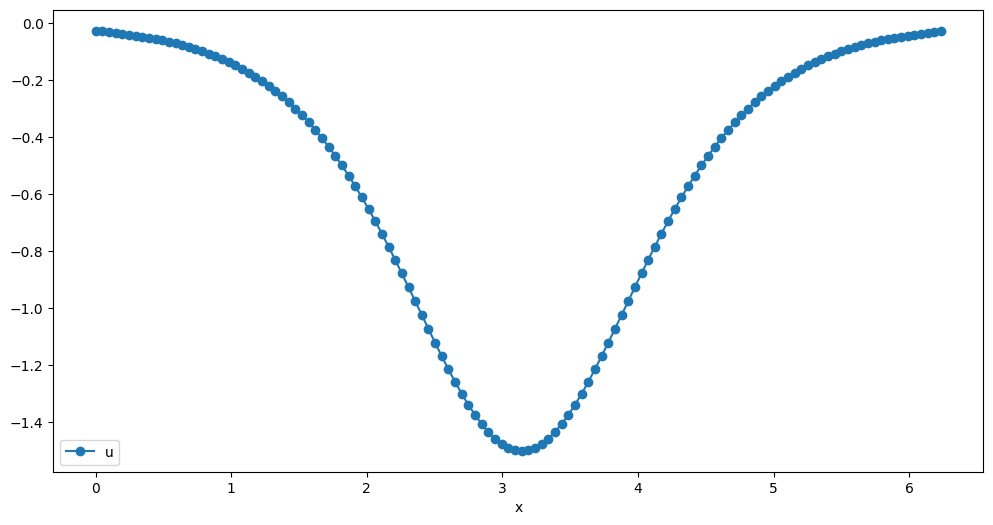

In [3]:
df = pd.read_csv("build/u-0.csv", names=("x", "u"))
df.plot(x="x", y="u", style="o-");

In [4]:
fig, ax = plt.subplots(figsize=(12,6))

ax.set_xlim(0, 2*np.pi)
ax.set_ylim(-2, 2)

line, = ax.plot([], [], lw=2)
plt.close()

In [5]:
def init():
    #line.set_data([], [])
    return (line,)

def animate(i):
    df = pd.read_csv(f"build/u-{i}.csv", names=("x", "u"))
    line.set_data(df["x"], df["u"])
    return (line,)

#### Show an animation of the time evolution of the solution

In [6]:
animation.FuncAnimation(fig, animate, init_func=init,
                        frames=range(0, 100000, 1000), interval=100, blit=True)

In [7]:
# Timing with output disabled
t = pd.DataFrame(np.array([[1, 2.40026, 0.000945402, 0.866719, 0],
                           [2, 1.23193, 0.0191336, 0.436343, 0], 
                           [4, 0.618883, 0.00518464, 0.217661, 0],
                           [8, 0.317354, 0.00461102, 0.110456, 0],
                           [16, 0.170447, 0.00834276, 0.0557998, 0],
                           [32, 0.0912811, 0.00788811, 0.0281533, 0],
                           [64, 0.0571396, 0.00410811, 0.0165145, 0]]),
                   columns=['procs', 'all', 'ghosts', 'rhs', 'output'])
t

,procs,all,ghosts,rhs,output
0,1.0,2.400260,0.000945,0.866719,0.0
1,2.0,1.231930,0.019134,0.436343,0.0
2,4.0,0.618883,0.005185,0.217661,0.0
3,8.0,0.317354,0.004611,0.110456,0.0
4,16.0,0.170447,0.008343,0.055800,0.0
5,32.0,0.091281,0.007888,0.028153,0.0
6,64.0,0.057140,0.004108,0.016515,0.0


In [8]:
t['all_perfect'] = t['all'][0] / t['procs']

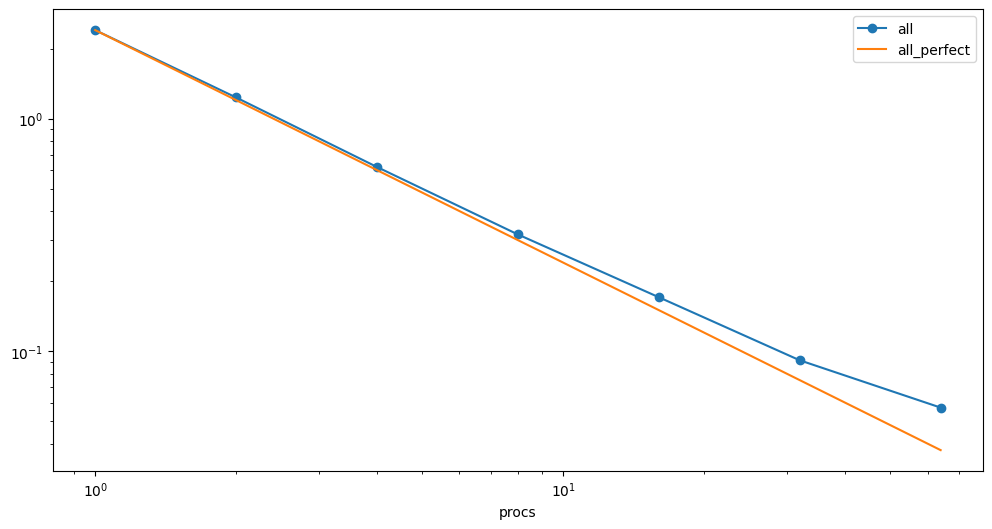

In [10]:
log = True
ax = t.plot(x='procs', y='all', logx=log, logy=log, marker='o')
t.plot(x='procs', y='all_perfect', ax=ax);